# Predicting whether the cancer is Benign or Malignant

## Problem Statement:
The objective of the dataset is to predict whether Predict whether the cancer is benign or malignant

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.



## Data Definition:

Input variables:

1) **id** (id number)


2) **radius_mean:** mean of distances from center to points on the perimeter


3) **texture_mean:** standard deviation of gray-scale values


4) **perimeter_mean:** mean size of the core tumor


5) **area_mean:** has housing loan? (categorical: 'no','yes','unknown')


6) **smoothness_mean:** mean of local variation in radius lengths


7) **compactness_mean:** mean of perimeter^2 / area - 1.0


8) **concavity_mean:** mean of severity of concave portions of the contour


9) **concave points_mean:** mean for number of concave portions of the contour


10) **symmetry_mean:** 


11) **fractal_dimension_mean:** mean for "coastline approximation" - 1



12) **radius_se:** standard error for the mean of distances from center to points on the perimeter


13) **texture_se:** standard error for standard deviation of gray-scale values


14) **perimeter_se:** 


15) **area_se:**


16) **smoothness_se:** standard error for local variation in radius lengths


17) **compactness_se:** standard error for perimeter^2 / area - 1.0


18) **concavity_se:** standard error for severity of concave portions of the contour


19) **concave points_se:** standard error for number of concave portions of the contour


20) **symmetry_se:** 


21) **fractal_dimension_se:** standard error for "coastline approximation" - 1


22) **radius_worst:** "worst" or largest mean value for mean of distances from center to points on the perimeter


23) **texture_worst:** "worst" or largest mean value for standard deviation of gray-scale values


24) **perimeter_worst:**


25) **area_worst:** 


26) **smoothness_worst:** "worst" or largest mean value for local variation in radius lengths


27) **compactness_worst:** "worst" or largest mean value for perimeter^2 / area - 1.0


28) **concavity_worst:** "worst" or largest mean value for severity of concave portions of the contour


29) **concave points_worst:** "worst" or largest mean value for number of concave portions of the contour


30) **symmetry_worst:** 


31) **fractal_dimension_worst:** "worst" or largest mean value for "coastline approximation" - 1


Output variable (desired target):

32) **diagnosis:**  The diagnosis of breast tissues (M = malignant, B = benign)


## Exploratory Data Analysis and Data Preparation

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score,f1_score, roc_curve, roc_auc_score, accuracy_score
from xgboost.sklearn import XGBClassifier
from sklearn import tree
import graphviz
from IPython.display import Image
from warnings import filterwarnings

In [28]:
filterwarnings("ignore")
pd.options.display.max_columns = None

In [29]:
df =pd.read_csv("Project 6 - Ensemble Techniques/Dataset/cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [31]:
df.drop(["id","Unnamed: 32"], axis = 1,inplace =True)

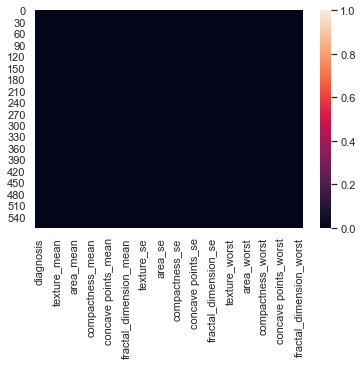

In [32]:
sns.heatmap(df.isnull(), vmin = 0, vmax = 1)
plt.show()

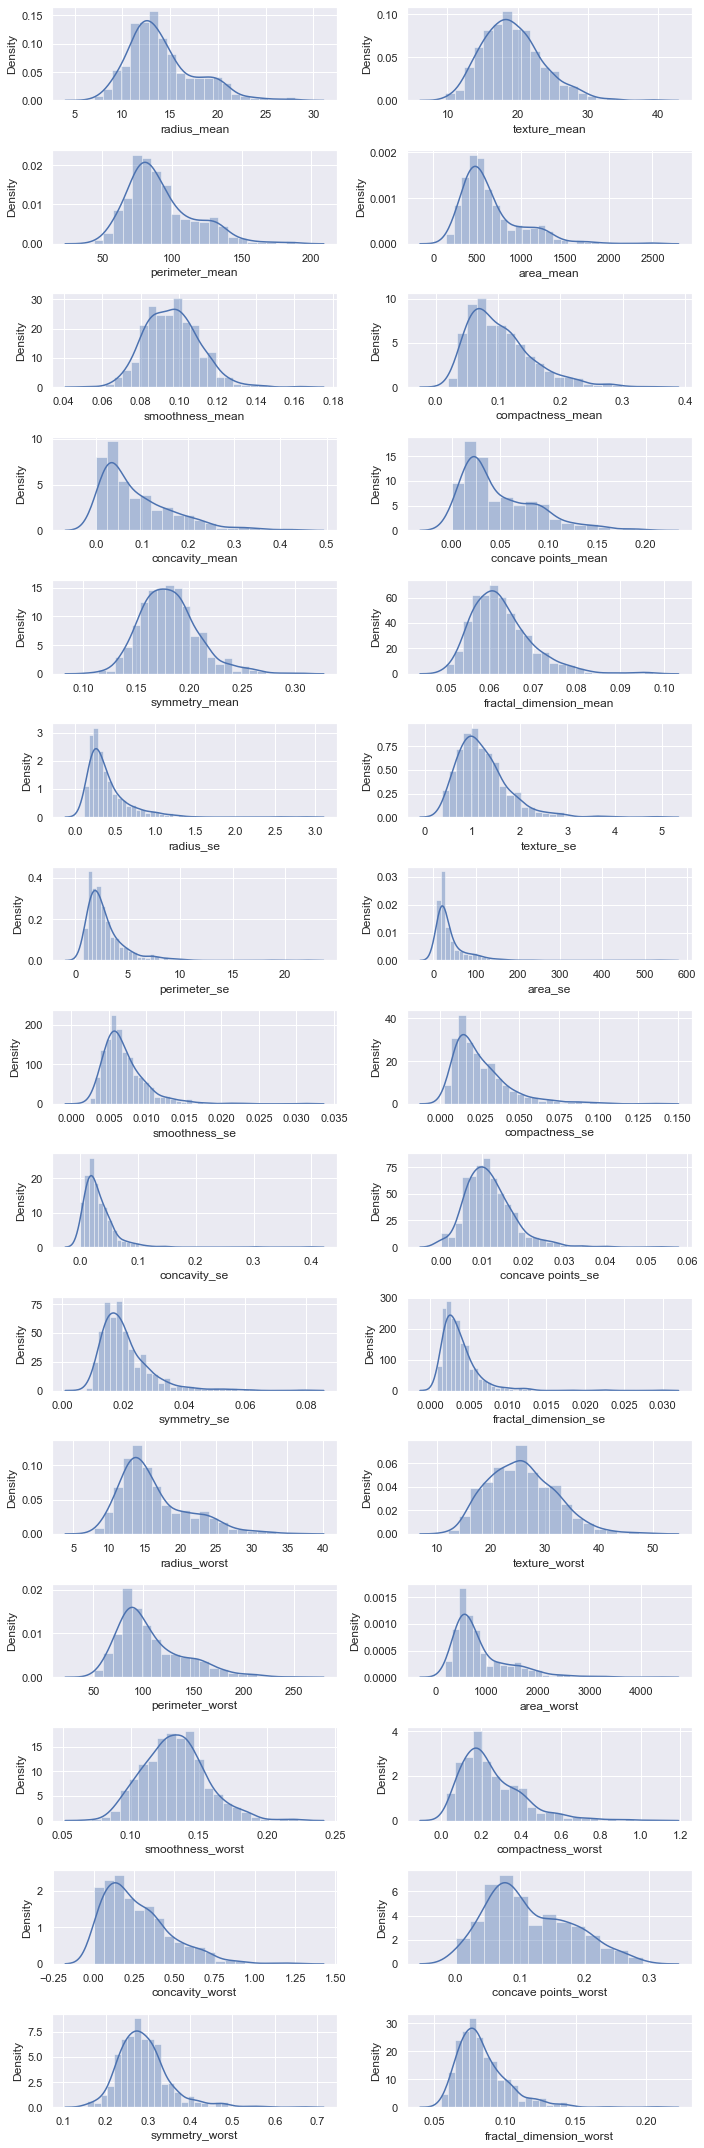

In [33]:
fig, ax = plt.subplots(nrows = 15, ncols = 2, figsize =(10,30))
for i,j in zip(df.columns.drop("diagnosis"), ax.flatten()):
    sns.distplot(df[i], ax = j)
plt.tight_layout()
plt.show()

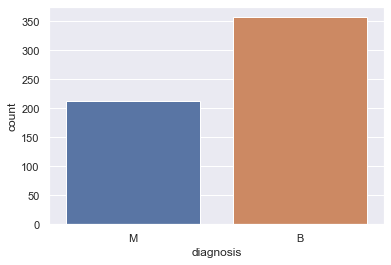

In [34]:
sns.countplot(df.diagnosis)
plt.show()

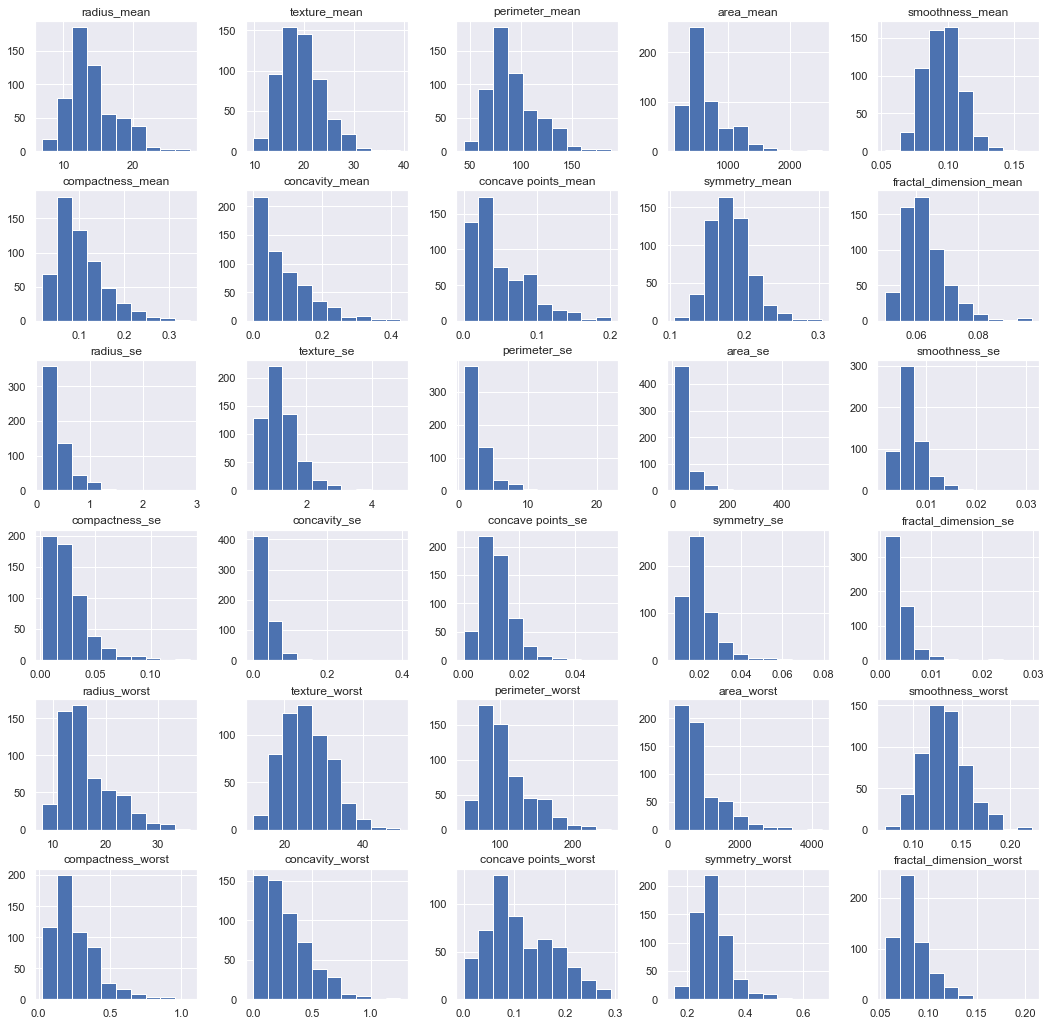

In [35]:
sns.set()
df.hist(figsize = (18,18))
plt.show()

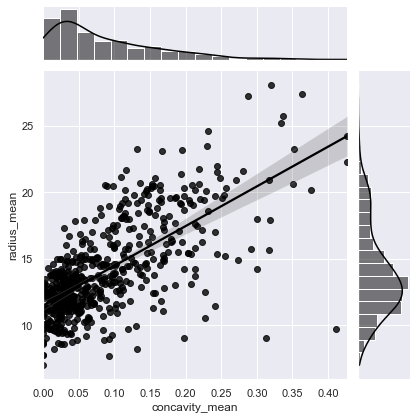

In [36]:
sns.jointplot(x= df.concavity_mean, y = df.radius_mean, kind = "reg", color="black")
plt.show()

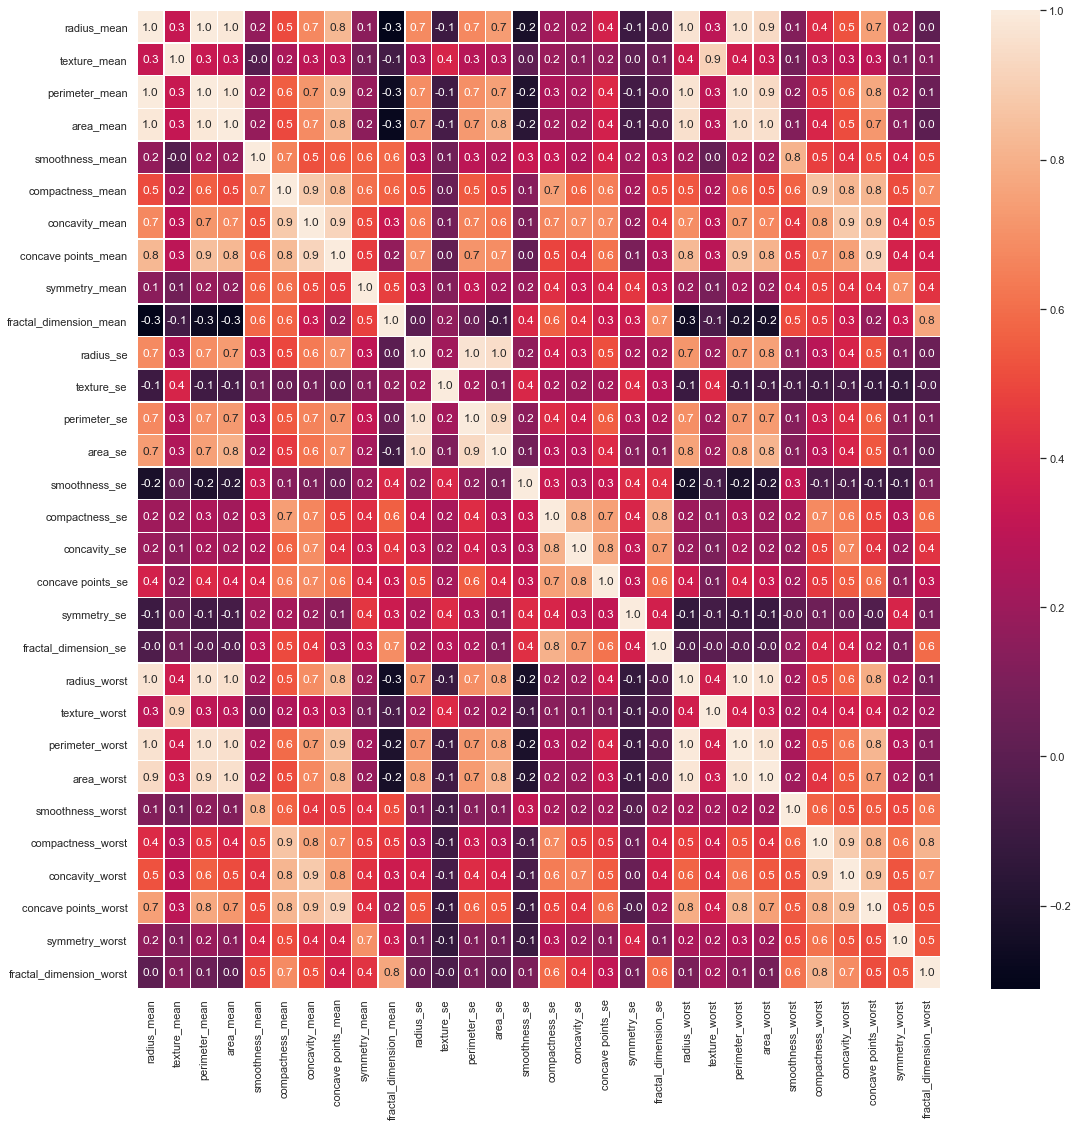

In [37]:
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, fmt = ".1f", ax = ax)
plt.show()

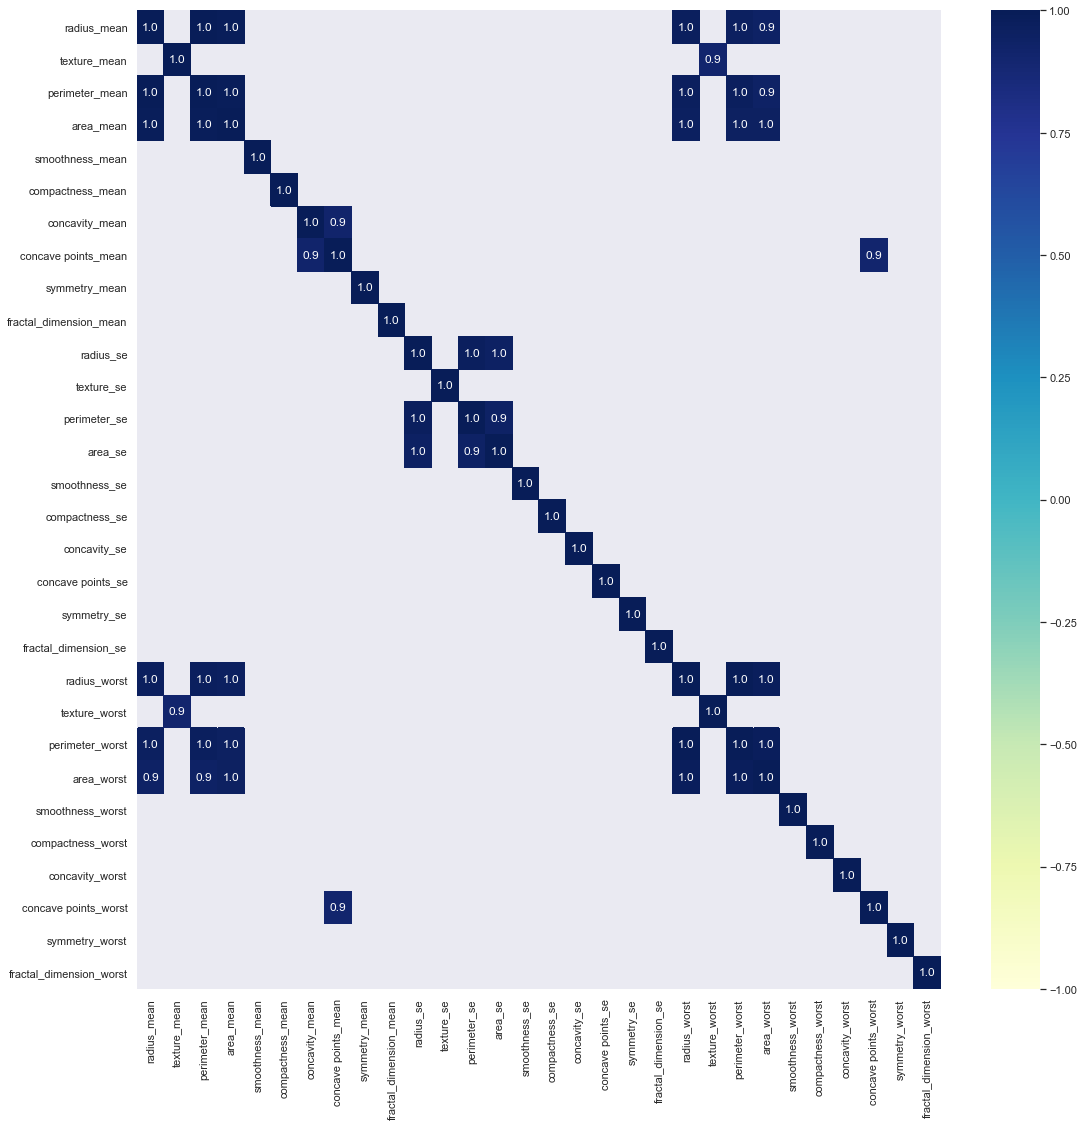

In [38]:
corr =df.corr()
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(corr[(corr<=-0.9)|(corr>=0.9)], annot = True, cmap = "YlGnBu" , fmt = ".1f", ax = ax, vmin = -1, vmax=1)
plt.show()

In [39]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
final_df = df.drop(drop_list, axis =1)
final_df

,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,10.38,1001.0,0.11840,0.30010,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.16220,0.7119,0.4601,0.11890
1,M,17.77,1326.0,0.08474,0.08690,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.12380,0.2416,0.2750,0.08902
2,M,21.25,1203.0,0.10960,0.19740,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.14440,0.4504,0.3613,0.08758
3,M,20.38,386.1,0.14250,0.24140,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.20980,0.6869,0.6638,0.17300
4,M,14.34,1297.0,0.10030,0.19800,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.13740,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,22.39,1479.0,0.11100,0.24390,0.1726,0.05623,1.2560,158.70,0.010300,0.05198,0.01114,0.004239,0.14100,0.4107,0.2060,0.07115
565,M,28.25,1261.0,0.09780,0.14400,0.1752,0.05533,2.4630,99.04,0.005769,0.03950,0.01898,0.002498,0.11660,0.3215,0.2572,0.06637
566,M,28.08,858.1,0.08455,0.09251,0.1590,0.05648,1.0750,48.55,0.005903,0.04730,0.01318,0.003892,0.11390,0.3403,0.2218,0.07820
567,M,29.33,1265.0,0.11780,0.35140,0.2397,0.07016,1.5950,86.22,0.006522,0.07117,0.02324,0.006185,0.16500,0.9387,0.4087,0.12400


In [40]:
final_df.diagnosis = final_df.diagnosis.replace("B",0)
final_df.diagnosis = final_df.diagnosis.replace("M",1)
final_df

,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,1001.0,0.11840,0.30010,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.16220,0.7119,0.4601,0.11890
1,1,17.77,1326.0,0.08474,0.08690,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.12380,0.2416,0.2750,0.08902
2,1,21.25,1203.0,0.10960,0.19740,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.14440,0.4504,0.3613,0.08758
3,1,20.38,386.1,0.14250,0.24140,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.20980,0.6869,0.6638,0.17300
4,1,14.34,1297.0,0.10030,0.19800,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.13740,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,22.39,1479.0,0.11100,0.24390,0.1726,0.05623,1.2560,158.70,0.010300,0.05198,0.01114,0.004239,0.14100,0.4107,0.2060,0.07115
565,1,28.25,1261.0,0.09780,0.14400,0.1752,0.05533,2.4630,99.04,0.005769,0.03950,0.01898,0.002498,0.11660,0.3215,0.2572,0.06637
566,1,28.08,858.1,0.08455,0.09251,0.1590,0.05648,1.0750,48.55,0.005903,0.04730,0.01318,0.003892,0.11390,0.3403,0.2218,0.07820
567,1,29.33,1265.0,0.11780,0.35140,0.2397,0.07016,1.5950,86.22,0.006522,0.07117,0.02324,0.006185,0.16500,0.9387,0.4087,0.12400


In [41]:
def model_efficiency(y_test, y_pred):
    print("Cohen Kappa Score: ", cohen_kappa_score(y_test, y_pred))
    print("F1 score: ", f1_score(y_test, y_pred))
    print("Classification report--> \n", classification_report(y_test, y_pred))
    cm =pd.DataFrame(confusion_matrix(y_test, y_pred), index = ["Actual:B", "Actual:M"], columns = ["Predicted:B", "Predicted:M"])
    sns.heatmap(cm, annot =True, fmt ="d")
    plt.show()

In [42]:
def plot_roc(y_test, y_pred_proba):
    fpr,tpr,thresholds = roc_curve(y_test, y_pred_proba)
    fig, ax = plt.subplots(figsize = (18,18))
    plt.plot(fpr, tpr)
    plt.plot([0,1],[0,1], "r--")
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False positive rate (1-Specificity)')
    plt.ylabel('True positive rate (Sensitivity)')
    plt.text(x = 0.02, y =0.9, s = ("AUC Score:", roc_auc_score(y_test,y_pred_proba)))

## Building the models

In [43]:
x= final_df.drop("diagnosis", axis = 1)
y = final_df.diagnosis
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state =10, test_size =0.3)

In [44]:
sgd = SGDClassifier(random_state= 10)
sgd_model = sgd.fit(x_train, y_train)
y_pred_sgd = sgd_model.predict(x_test)

Cohen Kappa Score:  0.565561044460127
F1 score:  0.7352941176470589
Classification report--> 
               precision    recall  f1-score   support

           0       0.90      0.76      0.83       112
           1       0.65      0.85      0.74        59

    accuracy                           0.79       171
   macro avg       0.78      0.80      0.78       171
weighted avg       0.82      0.79      0.79       171



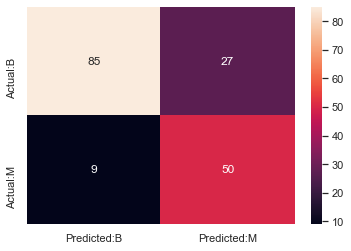

In [45]:
model_efficiency(y_test, y_pred_sgd)

In [46]:
dt = DecisionTreeClassifier(random_state= 10)
dt_model = dt.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
y_pred_prob_dt = dt_model.predict_proba(x_test)[:,1]

Cohen Kappa Score:  0.8483818531106841
F1 score:  0.903225806451613
Classification report--> 
               precision    recall  f1-score   support

           0       0.97      0.92      0.94       112
           1       0.86      0.95      0.90        59

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.92       171
weighted avg       0.93      0.93      0.93       171



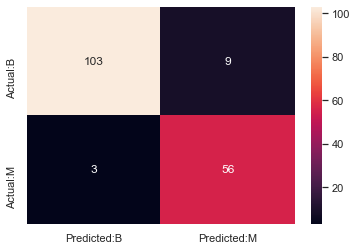

In [47]:
model_efficiency(y_test, y_pred_dt)

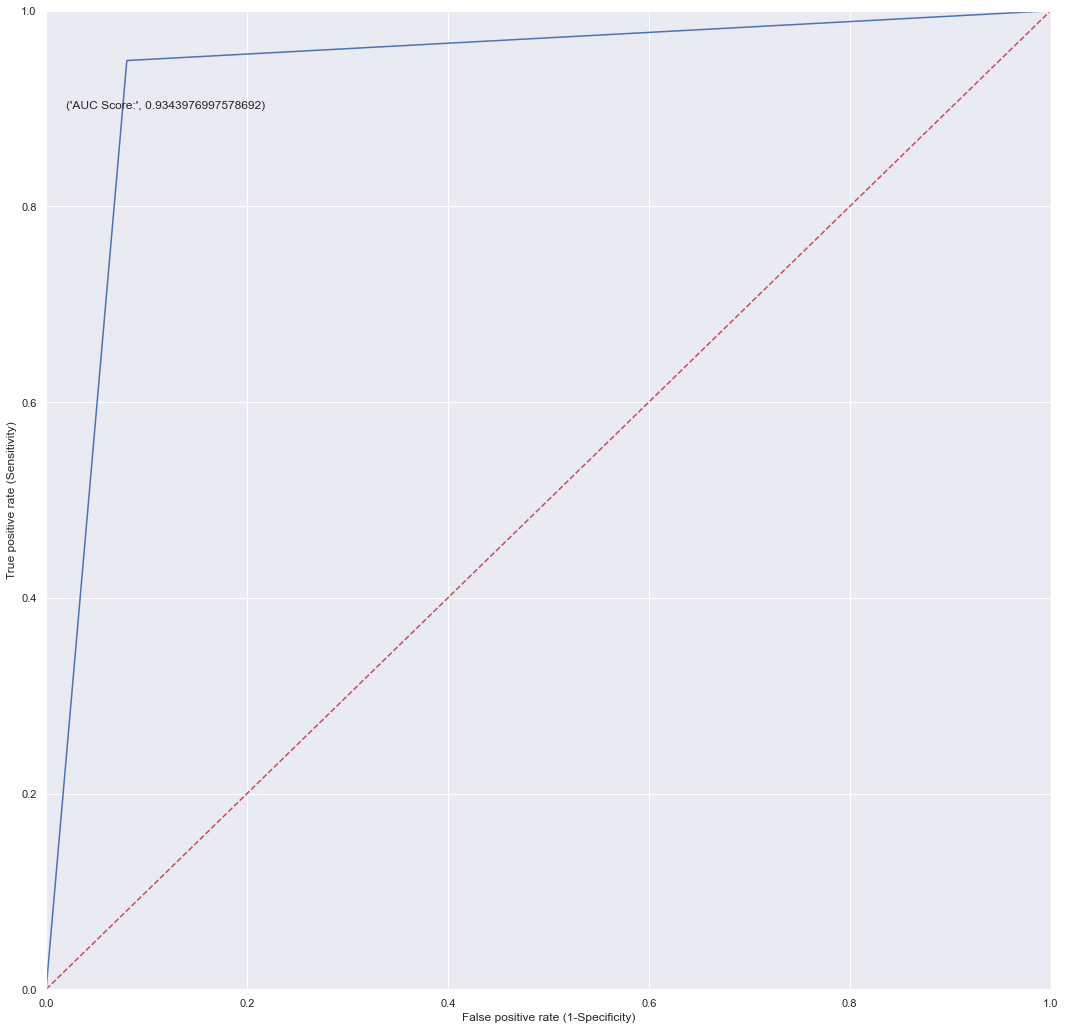

In [48]:
plot_roc(y_test, y_pred_prob_dt)

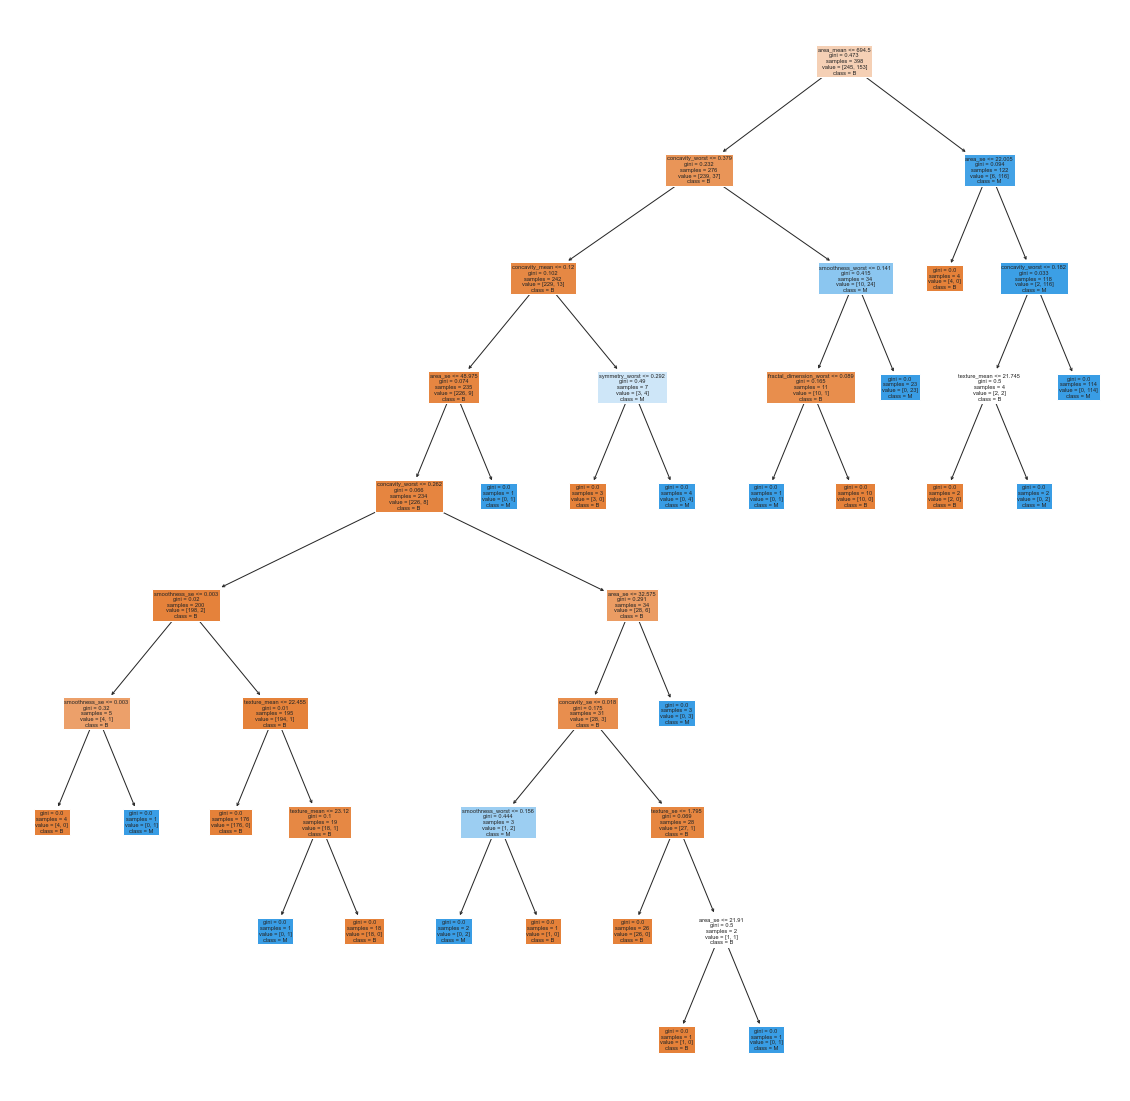

In [49]:
fig = plt.figure(figsize = (20,20))
_ = tree.plot_tree(dt_model, feature_names = x_train.columns, class_names = ["B","M"], filled =True)

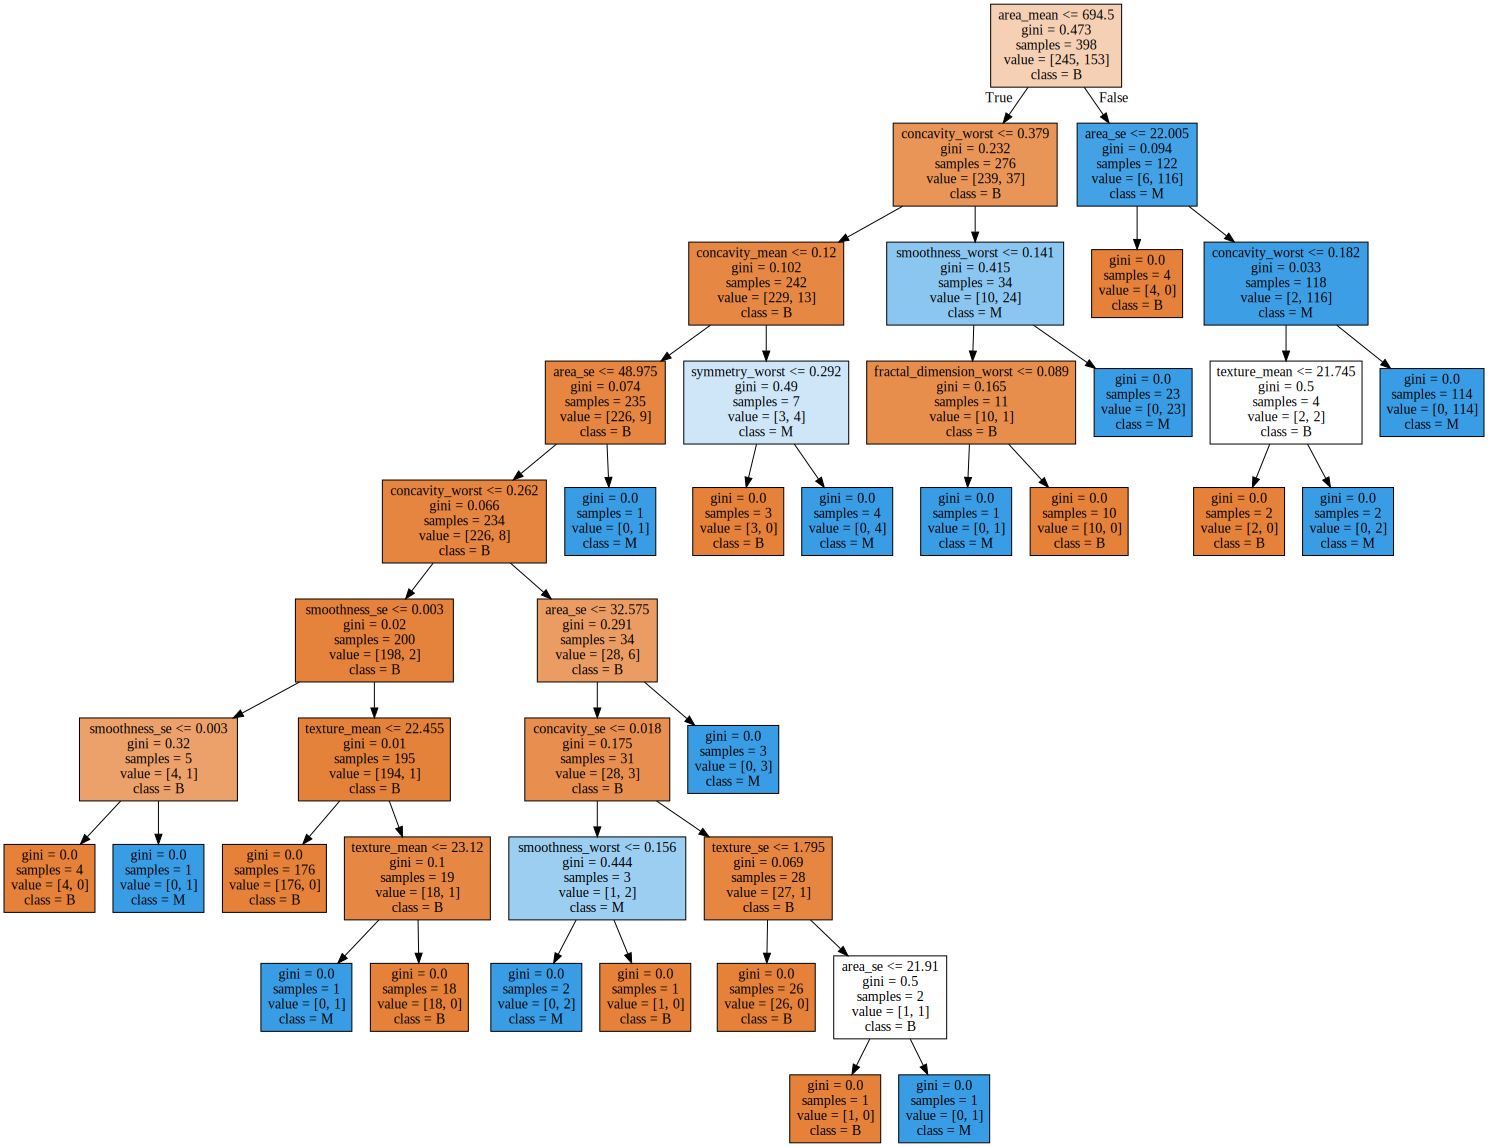

In [50]:
dot_data = tree.export_graphviz(dt_model,feature_names = x_train.columns, class_names = ["B","M"], filled =True, out_file =None)
graph = graphviz.Source(dot_data, format = "png")
graph

In [51]:
rf = RandomForestClassifier(random_state= 10)
rf_model = rf.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
y_pred_prob_rf = rf_model.predict_proba(x_test)[:,1]

Cohen Kappa Score:  0.9355640967669003
F1 score:  0.957983193277311
Classification report--> 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       112
           1       0.95      0.97      0.96        59

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



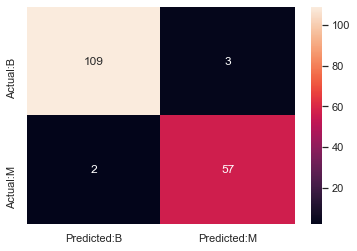

In [52]:
model_efficiency(y_test, y_pred_rf)

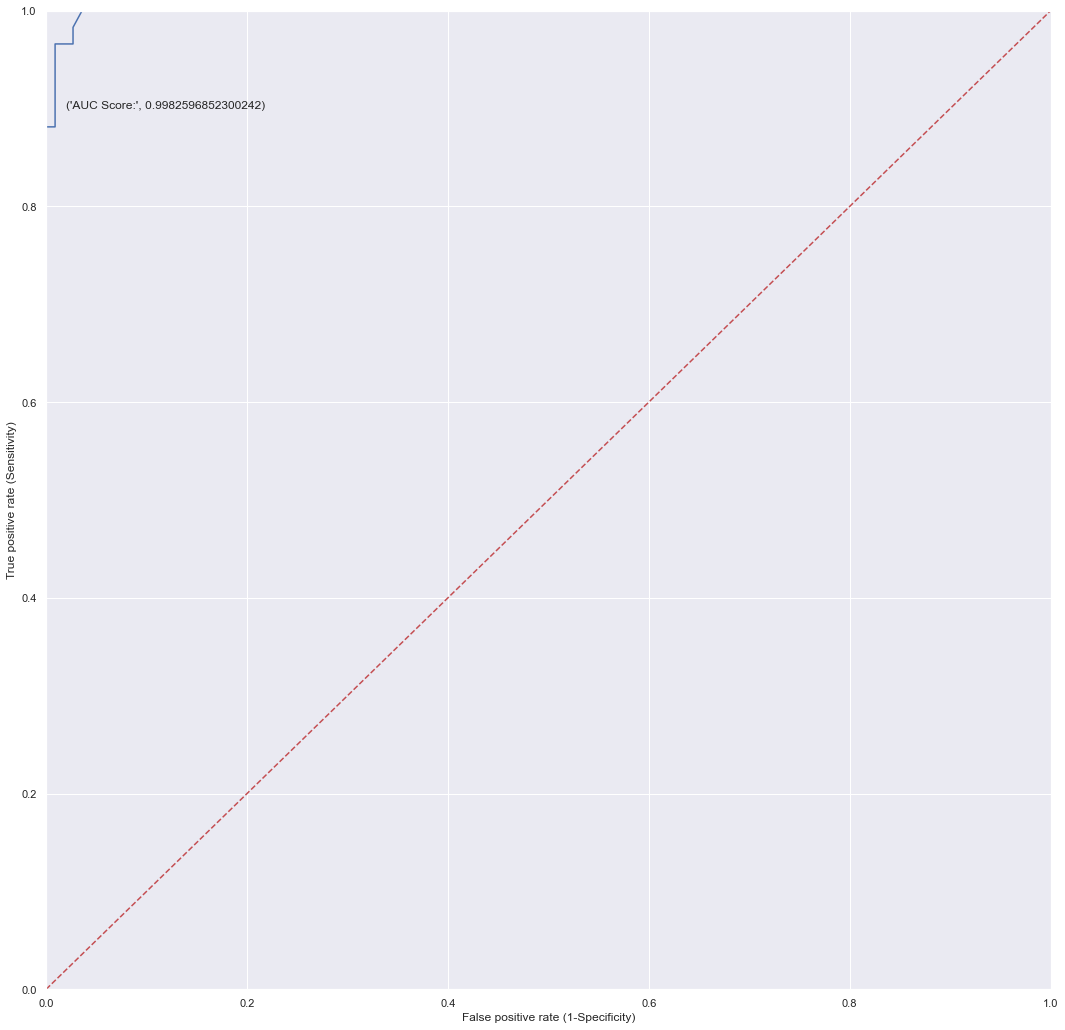

In [53]:
plot_roc(y_test, y_pred_prob_rf)

In [54]:
bag = BaggingClassifier(random_state= 10)
bag_model = bag.fit(x_train, y_train)
y_pred_bag = bag_model.predict(x_test)
y_pred_prob_bag = bag_model.predict_proba(x_test)[:,1]

Cohen Kappa Score:  0.9486563579042185
F1 score:  0.9666666666666667
Classification report--> 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       112
           1       0.95      0.98      0.97        59

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171



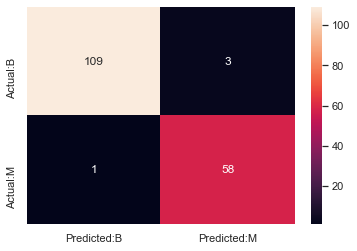

In [55]:
model_efficiency(y_test, y_pred_bag)

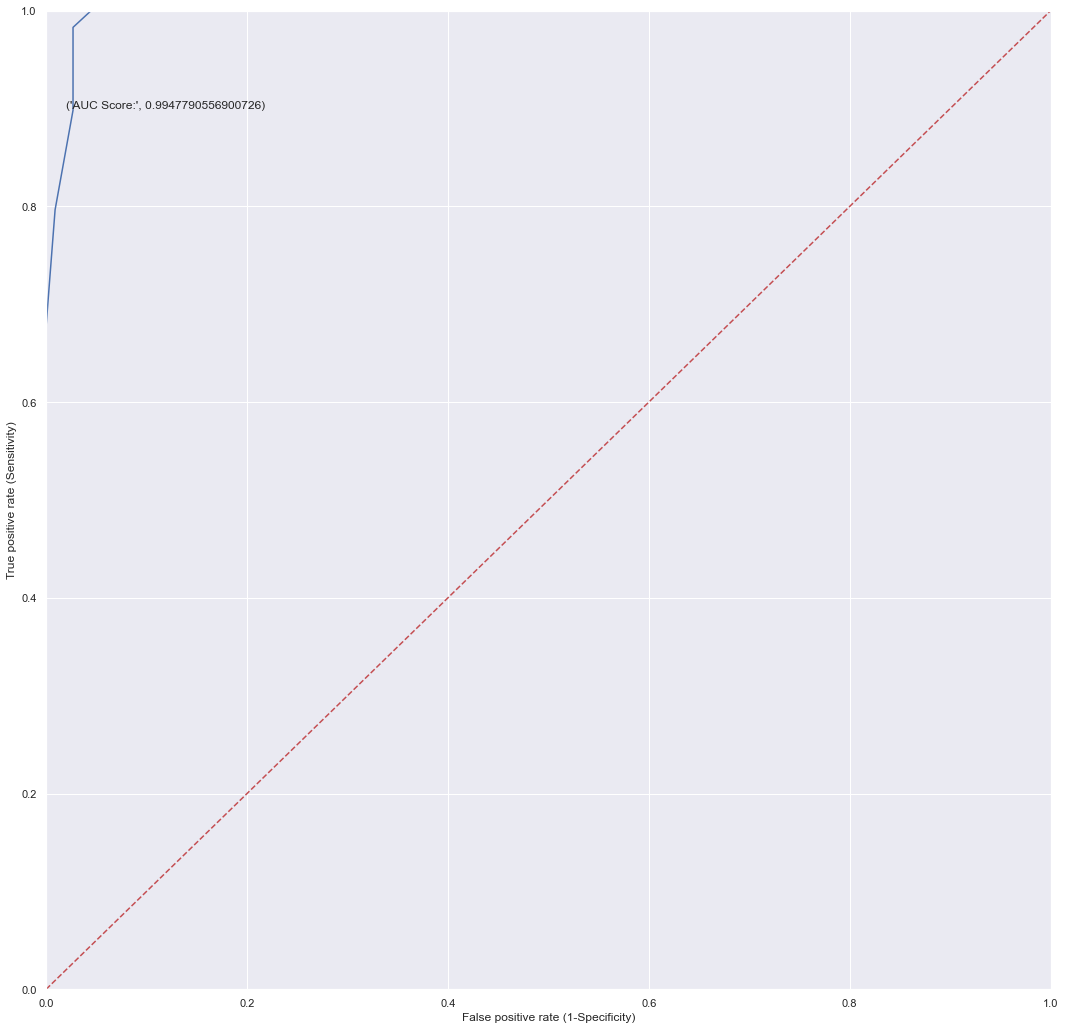

In [56]:
plot_roc(y_test, y_pred_prob_bag)

In [57]:
ada = AdaBoostClassifier(random_state= 10)
ada_model = ada.fit(x_train, y_train)
y_pred_ada = ada_model.predict(x_test)
y_pred_prob_ada = ada_model.predict_proba(x_test)[:,1]

Cohen Kappa Score:  0.9616448598130841
F1 score:  0.9752066115702479
Classification report--> 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       112
           1       0.95      1.00      0.98        59

    accuracy                           0.98       171
   macro avg       0.98      0.99      0.98       171
weighted avg       0.98      0.98      0.98       171



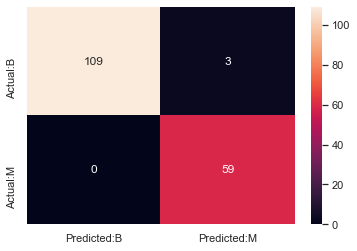

In [58]:
model_efficiency(y_test,y_pred_ada)

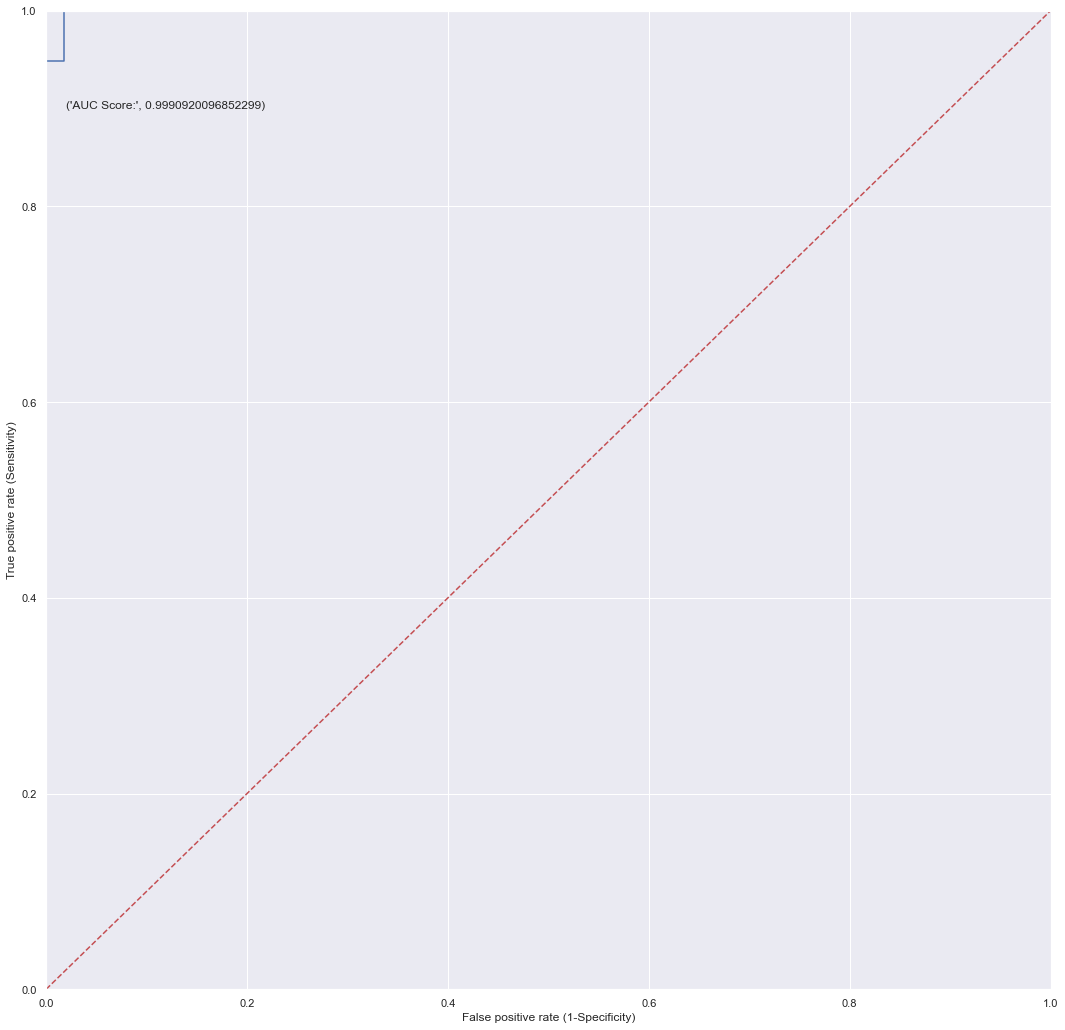

In [59]:
plot_roc(y_test, y_pred_prob_ada)

In [60]:
xgb = XGBClassifier(random_state= 10)
xgb_model = xgb.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
y_pred_prob_xgb = xgb_model.predict_proba(x_test)[:,1]

[11:42:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Cohen Kappa Score:  0.9360747663551402
F1 score:  0.9586776859504132
Classification report--> 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       112
           1       0.94      0.98      0.96        59

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



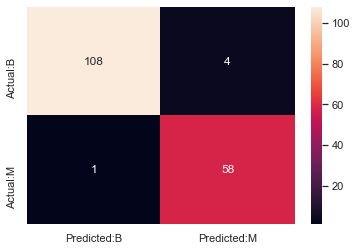

In [61]:
model_efficiency(y_test,y_pred_xgb)

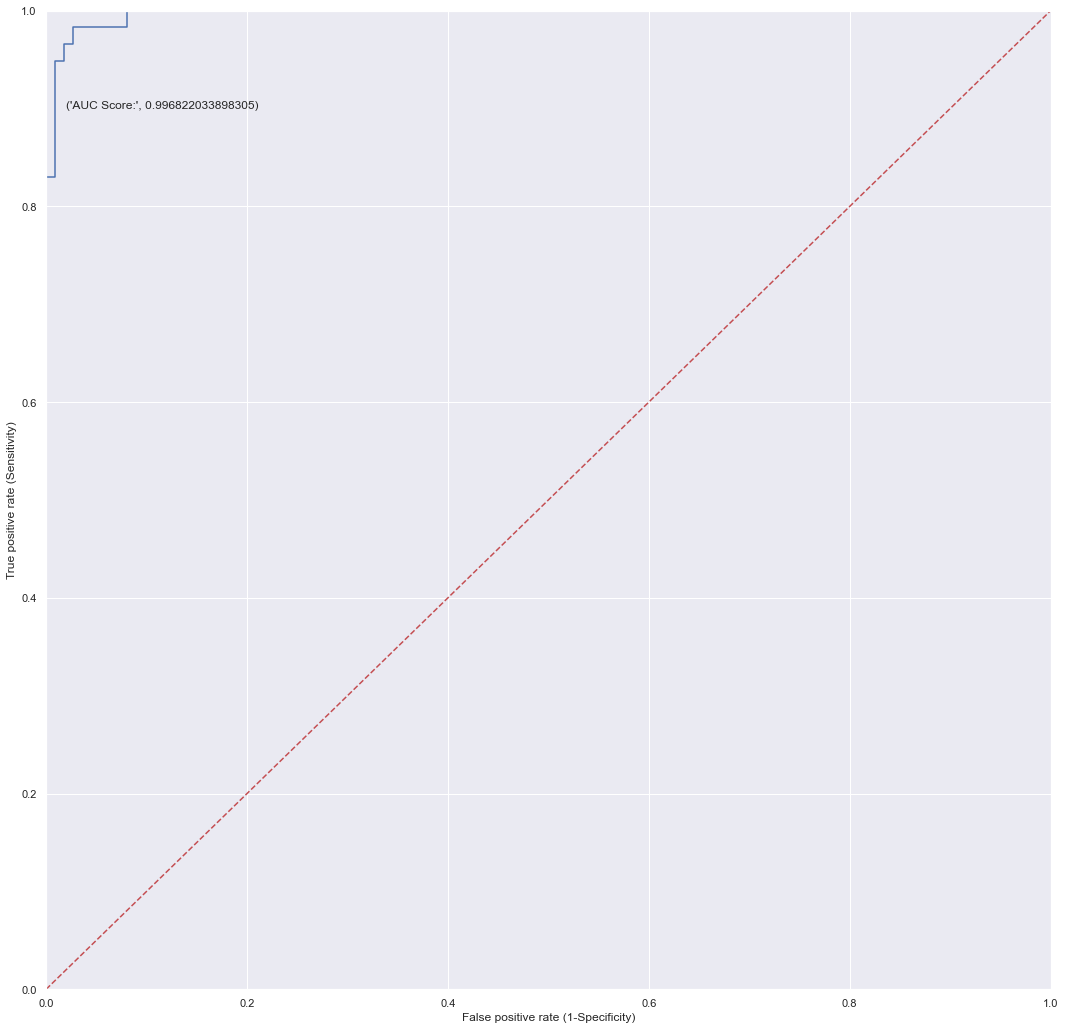

In [62]:
plot_roc(y_test,y_pred_prob_xgb)

## Results

In [66]:
pd.DataFrame({"Model Name": ["SGD Classifier", "Decision Tree Classifier","Random Forest Classifier","Bagging Classifier",
                             "AdaBoost Classifier"," XGB Classifier"],
             "Cohen Kappa Score": [cohen_kappa_score(y_test,y_pred_sgd),cohen_kappa_score(y_test,y_pred_dt),
                                  cohen_kappa_score(y_test,y_pred_rf),cohen_kappa_score(y_test,y_pred_bag),
                                   cohen_kappa_score(y_test,y_pred_ada),cohen_kappa_score(y_test,y_pred_xgb)],
             "F1 Score": [f1_score(y_test,y_pred_sgd),f1_score(y_test,y_pred_dt),
                          f1_score(y_test,y_pred_rf),f1_score(y_test,y_pred_bag),
                          f1_score(y_test,y_pred_ada),f1_score(y_test,y_pred_xgb)],
             "Accuracy": [accuracy_score(y_test,y_pred_sgd),accuracy_score(y_test,y_pred_dt),
                          accuracy_score(y_test,y_pred_rf),accuracy_score(y_test,y_pred_bag),
                          accuracy_score(y_test,y_pred_ada),accuracy_score(y_test,y_pred_xgb)],
             "ROC AUC Score":[roc_auc_score(y_test,y_pred_sgd),roc_auc_score(y_test,y_pred_dt),
                              roc_auc_score(y_test,y_pred_rf),roc_auc_score(y_test,y_pred_bag),
                              roc_auc_score(y_test,y_pred_ada),roc_auc_score(y_test,y_pred_xgb)]})

,Model Name,Cohen Kappa Score,F1 Score,Accuracy,ROC AUC Score
0,SGD Classifier,0.565561,0.735294,0.789474,0.803193
1,Decision Tree Classifier,0.848382,0.903226,0.929825,0.934398
2,Random Forest Classifier,0.935564,0.957983,0.970760,0.969658
3,Bagging Classifier,0.948656,0.966667,0.976608,0.978133
4,AdaBoost Classifier,0.961645,0.975207,0.982456,0.986607
5,XGB Classifier,0.936075,0.958678,0.970760,0.973668
